In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)


In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [3]:
%%time
# induce a grammar and train an estimator
training_graphs = get_graphs(dataset_fname, size=50)

from graphlearn.graphlearn import GraphLearnSampler
from eden.graph import Vectorizer
sampler=GraphLearnSampler(radius_list=[0,1], thickness_list=[2],random_state=42447,
                          min_cip_count=2, min_interface_count=2,
                          vectorizer=Vectorizer(5))
#take nu% of data as outlier
sampler.fit(training_graphs, nu=0.25, n_jobs=1)

print('graph grammar stats:')
n_instances, interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances, interface_counts, core_counts, cip_counts))

sampler.save('tmp/sampler.ge')

fitting was asked with n=1

Classifier:
SGDClassifier(alpha=0.00066790984481, average=False, class_weight=None,
       epsilon=0.1, eta0=0.301229078256, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=74, n_jobs=1,
       penalty='l1', power_t=0.948425692969, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 50  #interfaces: 25   #cores: 24   #core-interface-pairs: 71
graph grammar stats:
#instances: 50   #interfaces: 25   #cores: 24   #core-interface-pairs: 71
Saved model: tmp/sampler.ge
CPU times: user 16.2 s, sys: 2.71 s, total: 18.9 s
Wall time: 16.5 s


In [4]:
%%time
from graphlearn.graphlearn import GraphLearnSampler
sampler=GraphLearnSampler()
sampler.load('tmp/sampler.ge')

# graph sampling
graphs = get_graphs(dataset_fname, size=100)

id_start=34
id_end=id_start+12
from itertools import islice
graphs = islice(graphs,id_start,id_end)

# sample
n_steps=50
n_samples=2

from graphlearn.graphlearn import GraphLearnSampler
graphs = sampler.sample(graphs,
                        n_steps=n_steps, n_samples=n_samples,
                        target_orig_cip=False,
                        probabilistic_core_choice=True,
                        score_core_choice= False,
                        max_core_size_diff=-1,
                        burnin=1,
                        omit_seed=False,
                        max_cycle_size=0,
                        improving_threshold=.8, 
                        improving_linear_start=0.2,
                        accept_static_penalty=0.0,
                        n_jobs=1,
                        select_cip_max_tries=200,
                        keep_duplicates=True,
                       estimate_flowback=True)

Loaded model: tmp/sampler.ge
CPU times: user 64 ms, sys: 32 ms, total: 96 ms
Wall time: 97.5 ms


WARNING you set estimate backflow. the implementation is a little sketchy so dont try this with weired graphs. 
preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
batch_size: 10
    burnin: 1
estimate_flowback: True
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.000425999834056, average=False, class_weight=None,
       epsilon=0.1, eta0=0.302941094748, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=18, n_jobs=1,
       penalty='l1', power_t=0.265743221472, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimatorwrapper.EstimatorWrapper instance at 0x7f9fd7f3cef0>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f9fd7f3c7a0>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 10
improving_penalty_per_step: 0.0333333333333
improving_threshold: 40
keep_duplicates: True
    

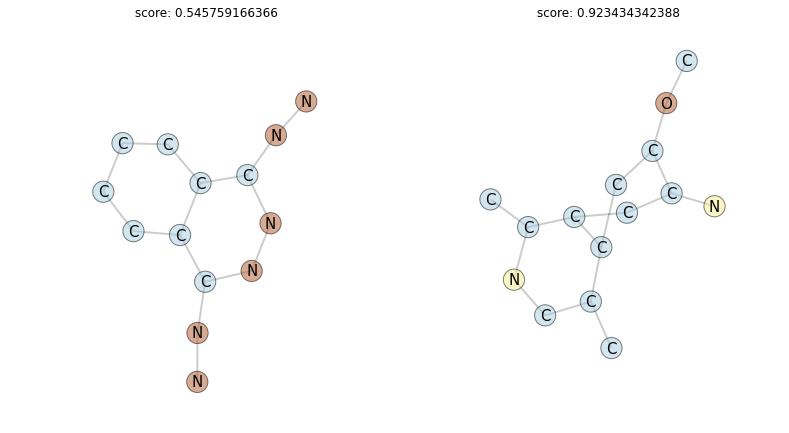

reverse_direction_modifier: 1.031250
_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.948718
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.038567
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.023529
_propose_graph: iteration 3 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 4 ; core 0 of 6 ; original_cips tried  0
reverse_direction_modifier: 1.093023
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.060060
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 7 ; core 0 of 6 ; original_cips tried  0
reverse_direction_modifier: 1.020202
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 

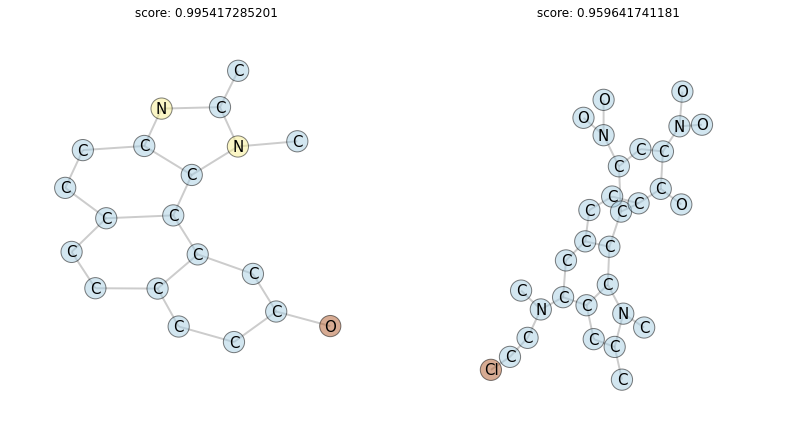

reverse_direction_modifier: 0.943734
_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.069565
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.920890
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.841860
_propose_graph: iteration 3 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.078775
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.041237
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.065306
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.017937
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.982379
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.931034
_propose_graph: iteration 

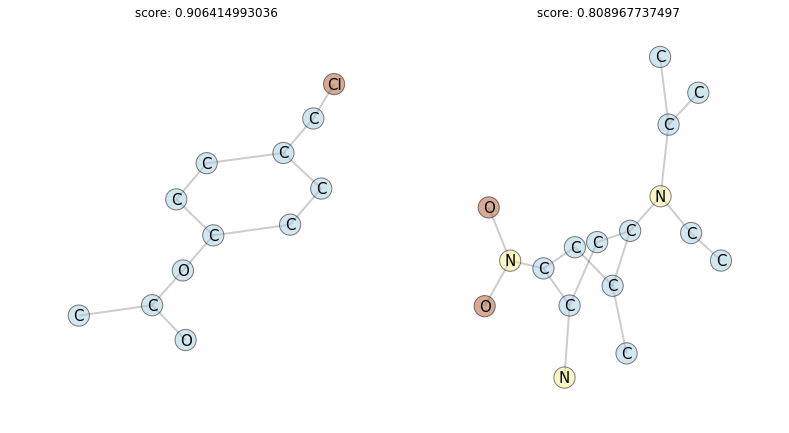

reverse_direction_modifier: 0.949686
_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.997351
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.819495
_propose_graph: iteration 2 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.230863
_propose_graph: iteration 3 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.189676
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.967871
_propose_graph: iteration 5 ; core 0 of 3 ; original_cips tried  0
reverse_direction_modifier: 1.004640
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0
reverse_direction_modifier: 1.124514
_propose_graph: iteration 7 ; core 0 of 9 ; original_cips tried  0
reverse_direction_modifier: 1.041379
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.871465
_propose_graph: iteratio

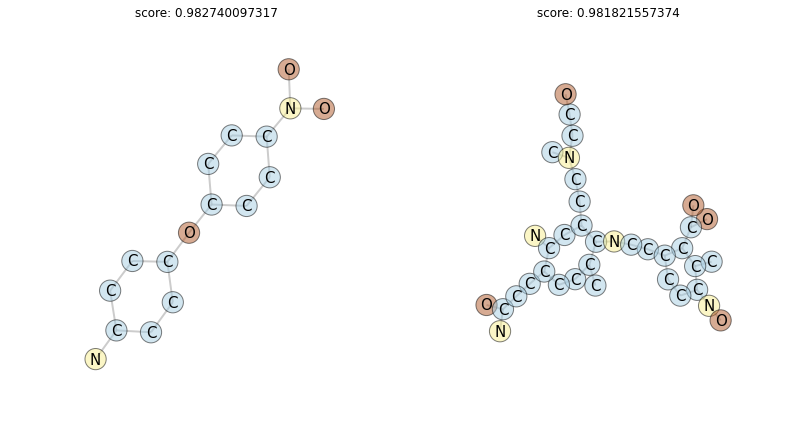

reverse_direction_modifier: 0.977273
_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.972414
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0
reverse_direction_modifier: 0.905444
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.169863
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.854801
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.167224
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.978478
_propose_graph: iteration 6 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 1.085779
_propose_graph: iteration 7 ; core 0 of 3 ; original_cips tried  0
reverse_direction_modifier: 1.018018
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.840865
_propose_graph: iteration 9

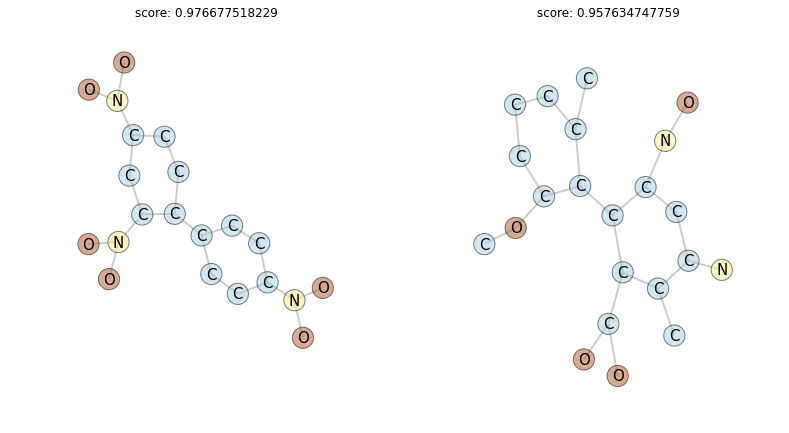

reverse_direction_modifier: 1.308351
_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.088508
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.860140
_propose_graph: iteration 2 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 0.926606
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.200000
_propose_graph: iteration 4 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.932632
_propose_graph: iteration 5 ; core 0 of 3 ; original_cips tried  0
reverse_direction_modifier: 0.790607
_propose_graph: iteration 6 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.272727
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.332481
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.332481
_propose_graph: iterati

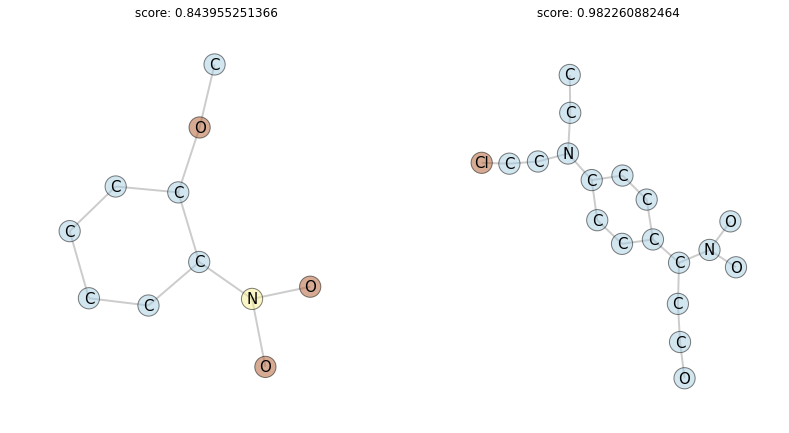

reverse_direction_modifier: 1.146110
_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.061644
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.113990
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.021598
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.978858
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.897674
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.941935
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.102273
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.008584
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.993808
_propose_graph: iteration 

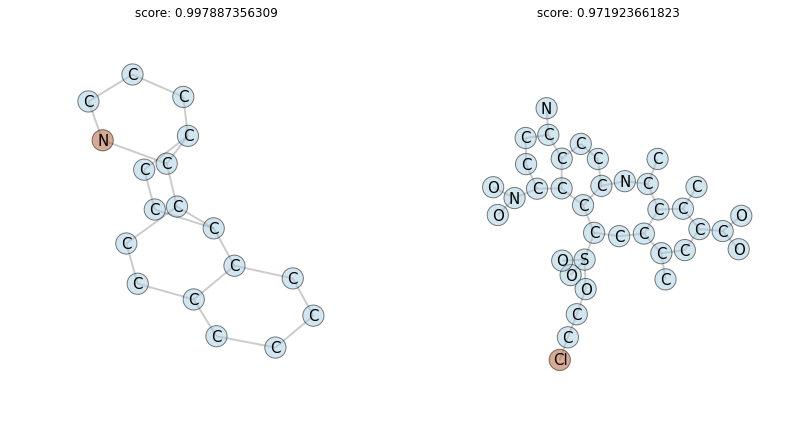

reverse_direction_modifier: 1.018307
_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.019802
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.101313
_propose_graph: iteration 2 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.071429
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.972766
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.009852
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.098335
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.989796
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.909790
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 

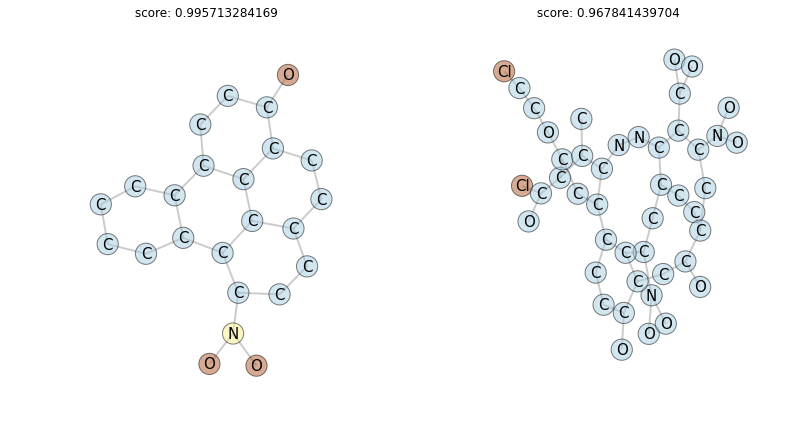

reverse_direction_modifier: 0.992674
_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.011976
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.930851
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.979832
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.011261
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.019535
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.992854
_propose_graph: iteration 6 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 1.055944
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.055090
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.009174
_propose_graph: iteration 9

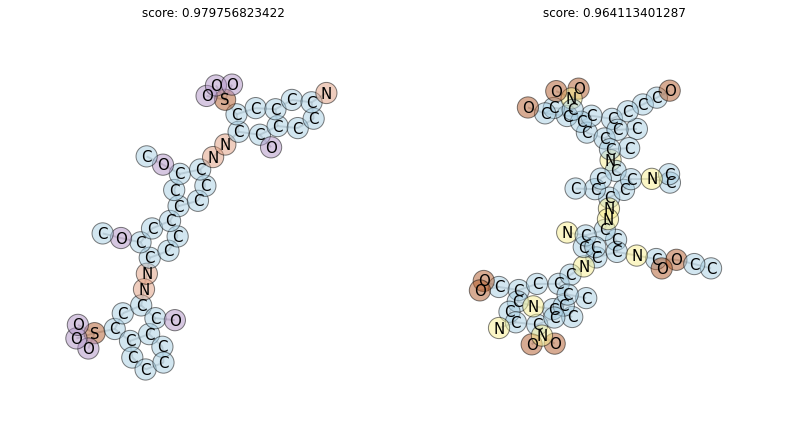

reverse_direction_modifier: 1.058120
_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 1 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.020478
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.023952
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.826087
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 5 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 0.970660
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.945409
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.951923
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.956332
_propose_graph: iteration

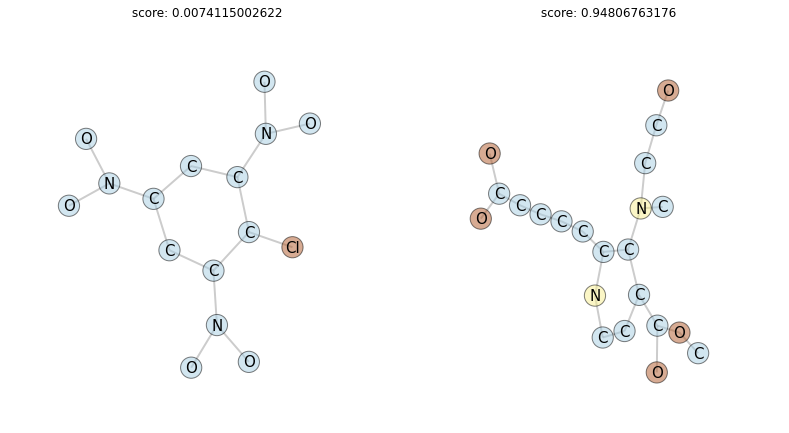

reverse_direction_modifier: 1.129032
_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.888496
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.147826
_propose_graph: iteration 2 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.964912
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.036364
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.969697
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.952174
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.129646
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.879781
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.121442
_propose_graph: iteration

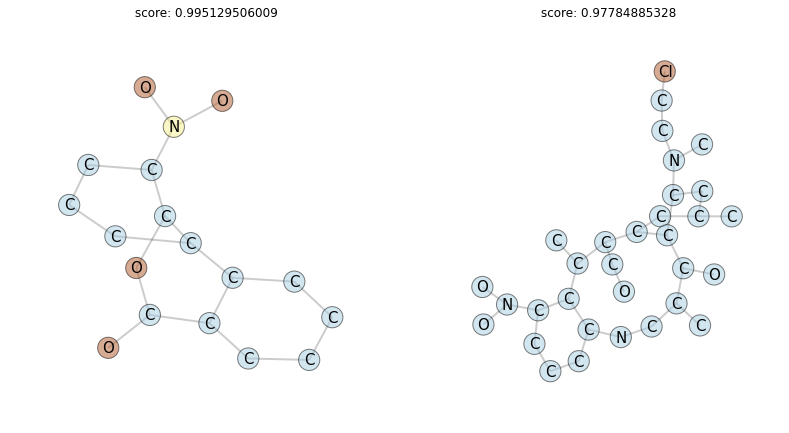

reverse_direction_modifier: 0.901056
_propose_graph: iteration 0 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 0.974504
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.047619
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 1.097033
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.940000
_propose_graph: iteration 4 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.092391
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.028061
_propose_graph: iteration 6 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.027304
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.032212
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.016043
_propose_graph: iteration

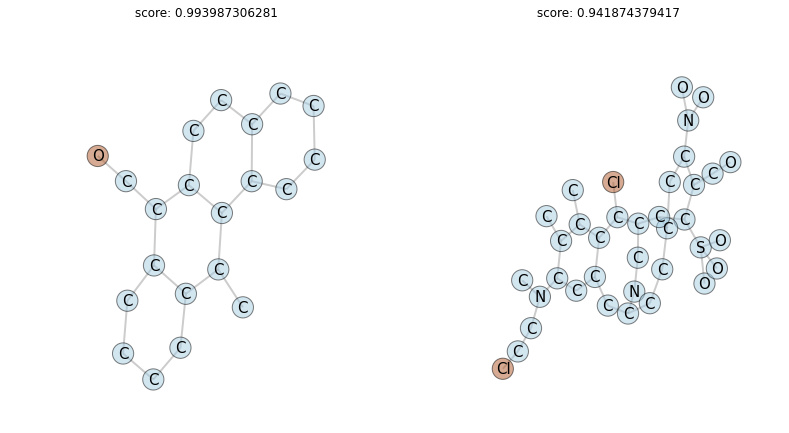

CPU times: user 55.9 s, sys: 804 ms, total: 56.7 s
Wall time: 57.9 s


In [11]:
%%time
# plot examples of sampling paths
from graphlearn.utils.draw import  graphlearn_draw, get_score_of_graph
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    graphlearn_draw(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=450,
                   headlinehook=get_score_of_graph)

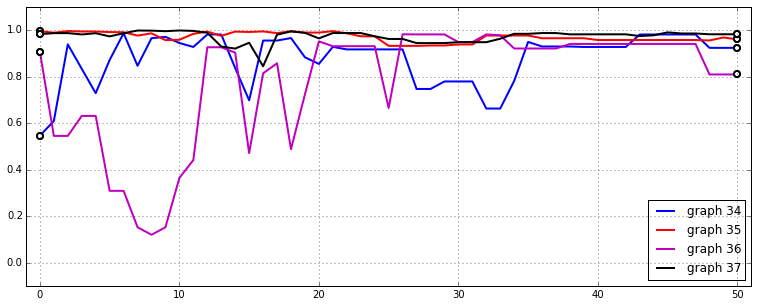

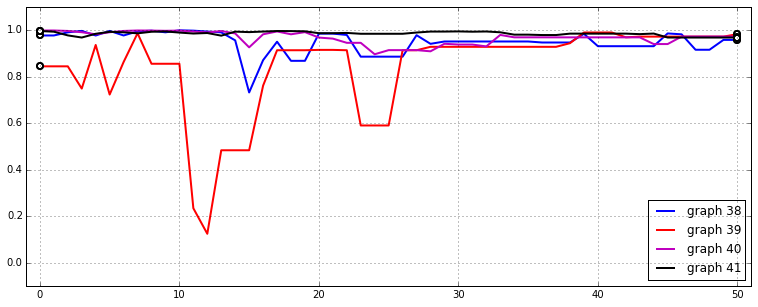

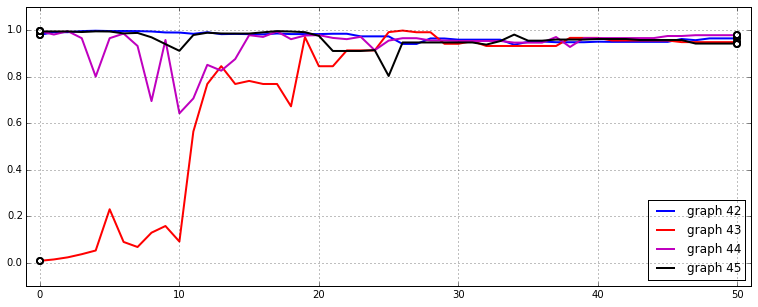

CPU times: user 836 ms, sys: 12 ms, total: 848 ms
Wall time: 868 ms


In [12]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
markevery=n_steps/(n_samples-1)
step=1
num_graphs_per_plot=4
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(13,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None',markevery=markevery, markerfacecolor='white', marker='o', markeredgewidth=2,markersize=6)
    plt.legend(loc='lower right')
    plt.grid()
    plt.xlim(-1,n_steps+1)
    plt.ylim(-0.1,1.1)
    plt.show()

.